In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head() 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [5]:
df.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.duplicated().sum() 

np.int64(0)

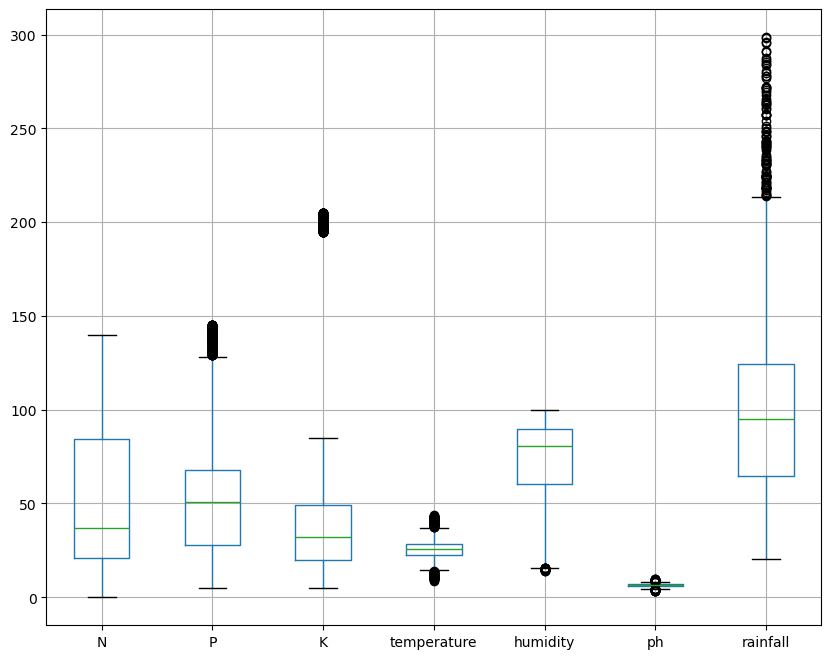

In [7]:
plt.figure(figsize=(10,8)) 
df.boxplot()
plt.show() 

In [8]:
df1 = df.copy()
df1.head() 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
corr = df1.select_dtypes(include=['int', 'float']).corr() 
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


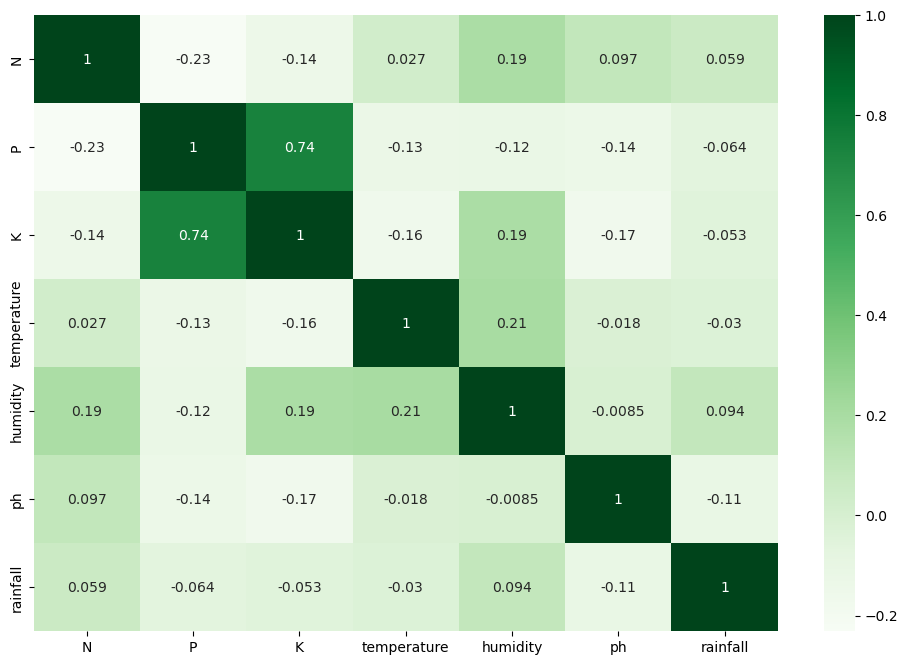

In [10]:
plt.figure(figsize=(12,8)) 
sns.heatmap(corr, annot=True, cmap='Greens') 
plt.show() 


In [11]:
x = df1.drop('label', axis=1) 
y = df1['label'] 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

x_train_sclaed = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train_sclaed, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
y_pred = model.predict(x_test_scaled)
y_pred 

array(['muskmelon', 'watermelon', 'papaya', ..., 'cotton', 'cotton',
       'coffee'], dtype=object)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


accuracy = accuracy_score(y_test, y_pred)*100 
classification_rep = classification_report(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred) 


print("Accuracy:", accuracy, "Classification report:", classification_rep)
print("confusion_matrix:", conf_matrix)

Accuracy: 95.11363636363637 Classification report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        83
      banana       1.00      0.89      0.94        79
   blackgram       0.95      0.93      0.94        82
    chickpea       1.00      1.00      1.00        82
     coconut       0.90      1.00      0.95        80
      coffee       0.97      0.99      0.98        79
      cotton       0.92      1.00      0.96        78
      grapes       1.00      1.00      1.00        81
        jute       0.83      0.95      0.88        75
 kidneybeans       1.00      0.98      0.99        84
      lentil       0.94      0.96      0.95        78
       maize       0.96      0.80      0.87        81
       mango       0.91      0.96      0.94        75
   mothbeans       0.84      0.91      0.87        85
    mungbean       1.00      1.00      1.00        75
   muskmelon       1.00      0.93      0.96        81
      orange       1.00      1

In [19]:
x_test.head() 

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465


In [22]:
new_data = [111, 11, 50, 30, 90, 8, 40]
new_data = np.array(new_data).reshape(1,-1)

prediction = model.predict(new_data)

print(prediction)

['banana']


In [23]:
import pickle 

with open('Cropmodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [24]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
